In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [40]:
df = pd.read_csv("./../data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1197,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1198,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [41]:
df.describe()

,id_person,id_gender,id_marrital_status,id_health_plan,id_person_recommendation,id_continuity_pf,Canal de Preferência,notes_count,done_activities_count,id_label,...,Mensagens Inbound,Mensagens Outbound,Ligações Inbound,Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência
count,1201.000000,1177.000000,1177.000000,524.000000,110.000000,395.000000,384.000000,1201.000000,1201.000000,103.000000,...,1090.000000,1157.000000,118.000000,579.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3484.417985,63.729822,80.618522,417.921756,2555.736364,338.878481,244.635417,1.183181,10.129892,317.135922,...,75.367890,82.845290,3.144068,2.861831,6.325397,8.714286,94.484683,0.880952,0.250000,24.182738
std,1468.657350,3.354873,0.976647,129.712462,1213.154949,0.327144,25.618050,1.908686,8.938574,11.220647,...,103.861166,97.922535,8.482537,8.430147,4.803434,7.736556,32.399305,1.536318,0.821159,76.092674
min,250.000000,63.000000,80.000000,78.000000,321.000000,338.000000,238.000000,0.000000,0.000000,284.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2399.000000,63.000000,80.000000,412.000000,1510.000000,339.000000,239.000000,0.000000,5.000000,313.000000,...,13.000000,19.000000,1.000000,1.000000,3.000000,3.000000,78.000000,0.000000,0.000000,0.000000
50%,3281.000000,64.000000,80.000000,412.000000,2379.000000,339.000000,239.000000,1.000000,8.000000,325.000000,...,40.000000,50.000000,1.000000,2.000000,5.000000,7.000000,88.000000,0.000000,0.000000,0.000000
75%,5115.000000,64.000000,82.000000,419.500000,3347.500000,339.000000,239.000000,2.000000,13.000000,325.000000,...,96.000000,110.000000,2.000000,3.000000,9.000000,12.000000,111.100000,1.000000,0.000000,0.000000
max,5956.000000,117.000000,83.000000,1164.000000,5556.000000,339.000000,360.000000,31.000000,137.000000,325.000000,...,1436.000000,1230.000000,80.000000,197.000000,30.000000,41.000000,383.750000,9.000000,7.000000,616.000000


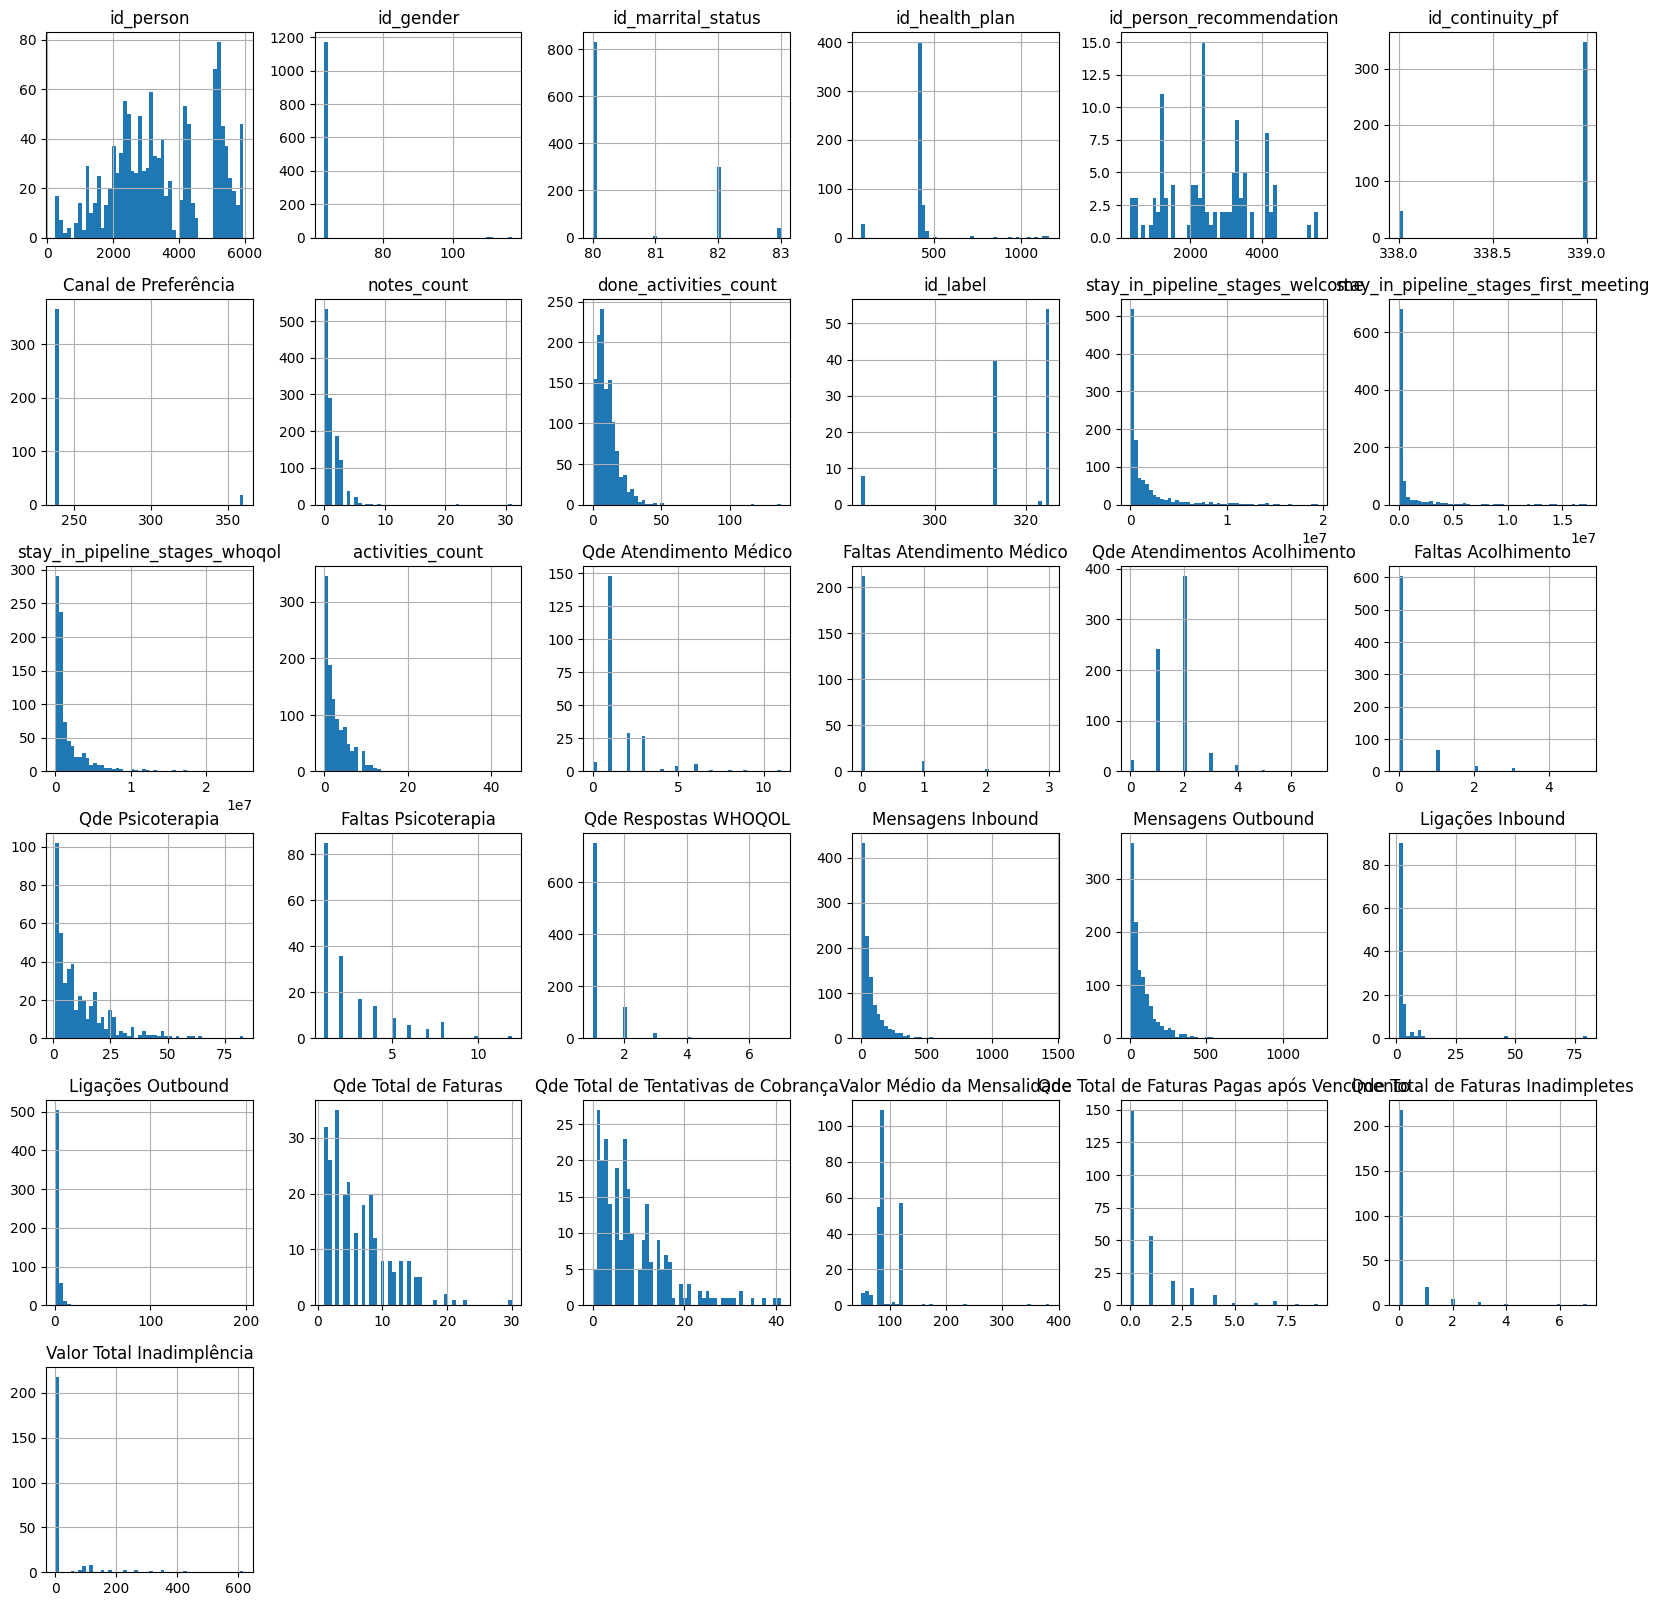

In [42]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Gráfico de dispersão para visualizar a relação entre a coluna de destino e outras colunas do conjunto de dados

# Análise Exploratória

In [43]:
df_erik = df[['Qde Total de Faturas Inadimpletes', 'Cancelamentos Atendimento Médico', 'Problemas Abertos', 'Psicológico', 'Método de Pagamento', 'Mensagens Inbound', 'notes_count', 'Físico', 'Qde Atendimento Médico', 'id_marrital_status', 'id_org', 'start_of_service']]

df_leo = df[['Qde Prescrições', 'Ligações Outbound', 'Datas Acolhimento', 'id_stage', 'Data Última Mensagens Inbound', 'Faltas Atendimento Médico', 'Pontos de Atenção', 'activities_count', 'Recebe Comunicados?', 'Qde Total de Faturas', 'Data Última Ligações Inbound', 'id_gender']]

df_matheus = df[['Faltas Acolhimento', 'Qde Perfis de Pagamento Inativos', 'Datas Prescrição', 'Valor Total Inadimplência', 'id_continuity_pf', 'add_time', 'Qde Respostas WHOQOL', 'Datas Psicoterapia', 'Cancelamentos Acolhimento', 'won_time', 'Canal de Preferência', 'Ambiental']]

df_alfredo = df[['lost_reason.1', 'lost_reason', 'Mensagens Outbound', 'Datas Atendimento Médico', 'stay_in_pipeline_stages_whoqol', 'id_label', 'done_activities_count', 'state', 'Faltas Psicoterapia', 'Data Última Mensagens Outbound', 'Qde Atendimentos Acolhimento', 'status']]

df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]

## Erik

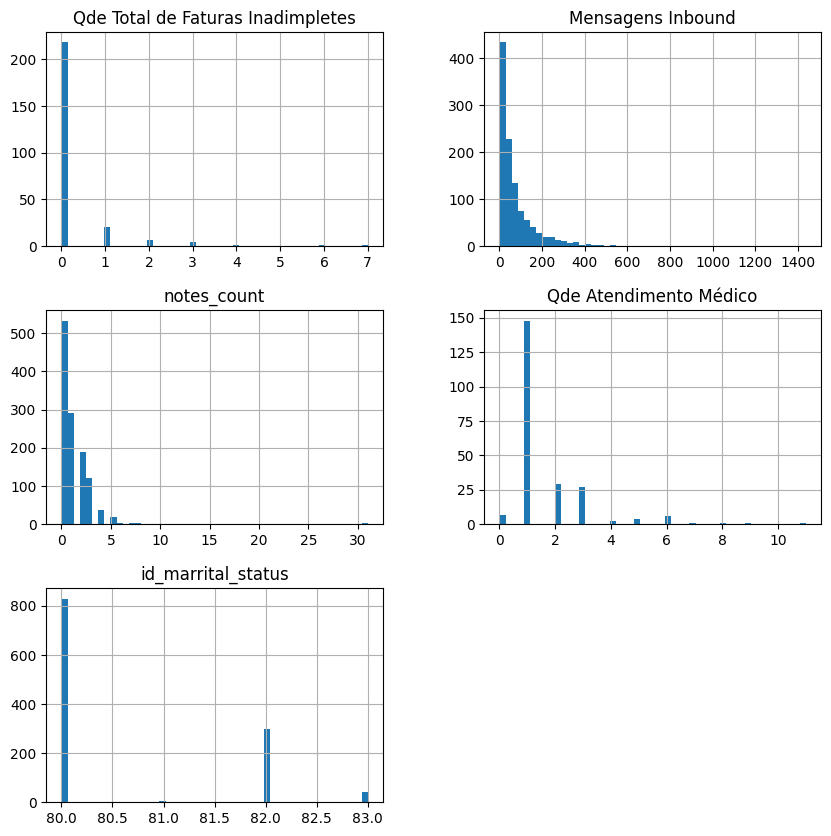

In [44]:
df_erik.hist(bins=50, figsize=(10,10))
plt.show()

In [45]:
df_erik["notes_count"].value_counts()

notes_count
0     533
1     290
2     188
3     122
4      37
5      20
6       3
31      2
8       2
7       2
22      1
9       1
Name: count, dtype: int64

Qtd total de faturas inadimplentes: Mudar para bool ou 1 e 0. Considerando apenas dois grupos, já teve inadimplente ou nunca teve inadimplente

In [46]:
df_erik["Qde Total de Faturas Inadimpletes"].value_counts()

Qde Total de Faturas Inadimpletes
0.0    218
1.0     20
2.0      7
3.0      4
4.0      1
6.0      1
7.0      1
Name: count, dtype: int64

Cancelamentos Atendimento Médico: Excluir colunas "Cancelamento Atendimento Médico" e coluna "Qde Atendimento Médico". Pois estão sem dados coletados.

In [47]:
colunas_bool = df_erik.select_dtypes(include='bool').columns
df_erik[colunas_bool].describe().transpose()

,count,unique,top,freq
Cancelamentos Atendimento Médico,1201,1,False,1201


In [48]:
colunas_object = df_erik.select_dtypes(include='object').columns
df_erik[colunas_object].describe().transpose()

,count,unique,top,freq
Problemas Abertos,610,548,ansiedade P01 (CIAP-2),11
Psicológico,898,130,4,275
Método de Pagamento,252,4,Cartão de crédito,227
Físico,898,139,"3,90",64
id_org,886,60,2457,123
start_of_service,1065,420,2023-06-12,44


Problemas Abertos: MUITO diverso, agrupar de alguma forma? 

In [49]:
df_erik["Problemas Abertos"].describe()

count                        610
unique                       548
top       ansiedade P01 (CIAP-2)
freq                          11
Name: Problemas Abertos, dtype: object

Também apresenta uma grande diversidade de dados, agrupar por categorias?

In [50]:
df_erik["Psicológico"].value_counts()

Psicológico
4                275
3                247
2                 58
5                 43
3,3               16
                ... 
3,7; 4,0; 3,3      1
3,2; 3,3; 3,3      1
3,7; 3,2           1
4,2; 4,7           1
3,2; 3,2           1
Name: count, Length: 130, dtype: int64

In [51]:
df_erik["Método de Pagamento"].value_counts()

Método de Pagamento
Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: count, dtype: int64

In [52]:
df_erik["Físico"].value_counts()

Físico
3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: count, Length: 139, dtype: int64

In [53]:
df_erik["id_marrital_status"].value_counts()

id_marrital_status
80.0    830
82.0    299
83.0     41
81.0      7
Name: count, dtype: int64

Id Org talvez não seja necessário, pois não é necessário o identificador da empresa para prever os cancelamentos.

In [54]:
df_erik["id_org"].value_counts()

id_org
2457          123
1436          104
448            98
2458           50
1251           46
1731           38
1210           32
1994           28
2319           26
438            25
1166           24
1271           23
1622           21
2391           21
1589           18
2503           17
1948           16
434            16
456            15
1538           13
1450           11
2420           11
1847           11
1047            9
382             8
2389            7
2273            6
1948; 1948      5
1348            5
929             4
1164            4
1812            4
1393            4
1023            4
1495            3
1483            3
2388            3
448; 448        3
1924            3
2430            2
1174            2
2393            2
2509            1
2505            1
1948; 2389      1
1677; 1677      1
2372            1
1204            1
1822            1
1251; 1251      1
1495; 1495      1
1182            1
1519            1
1436; 1436      1
1602            1
619

Talvez seja interessante agrupar os dados por mês, para ver se existe alguma sazonalidade.

In [55]:
df_erik["start_of_service"].value_counts()

start_of_service
2023-06-12                44
2022-03-04                38
2023-06-14                25
2022-08-01                22
2023-06-13                20
                          ..
2022-06-09; 2023-03-16     1
2022-06-06                 1
2022-06-03                 1
2022-06-01; 2022-12-26     1
2023-11-08                 1
Name: count, Length: 420, dtype: int64

## Leo

In [56]:
df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1201 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              679 non-null    object 
 3   id_stage                       1078 non-null   object 
 4   Data Última Mensagens Inbound  1090 non-null   object 
 5   Faltas Atendimento Médico      227 non-null    float64
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1177 non-null   float64
dtypes: bool(1), float64(5), object(6)
memory usage: 

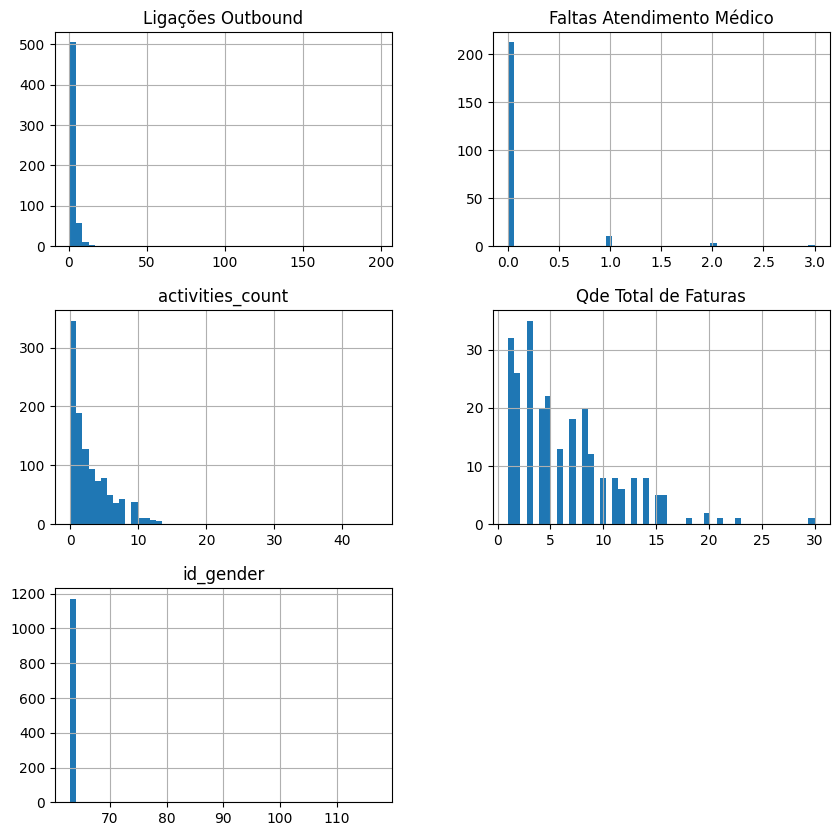

In [57]:
df_leo.hist(bins=50, figsize=(10,10))
plt.show()

### Ligações Outbound

In [58]:
ligacoes_outbound = df_leo['Ligações Outbound']

In [59]:
vc = ligacoes_outbound.value_counts()
vc

Ligações Outbound
1.0      240
2.0      145
3.0       81
4.0       39
5.0       22
6.0       20
7.0       12
9.0        5
8.0        4
10.0       3
12.0       2
14.0       2
11.0       1
197.0      1
16.0       1
31.0       1
Name: count, dtype: int64

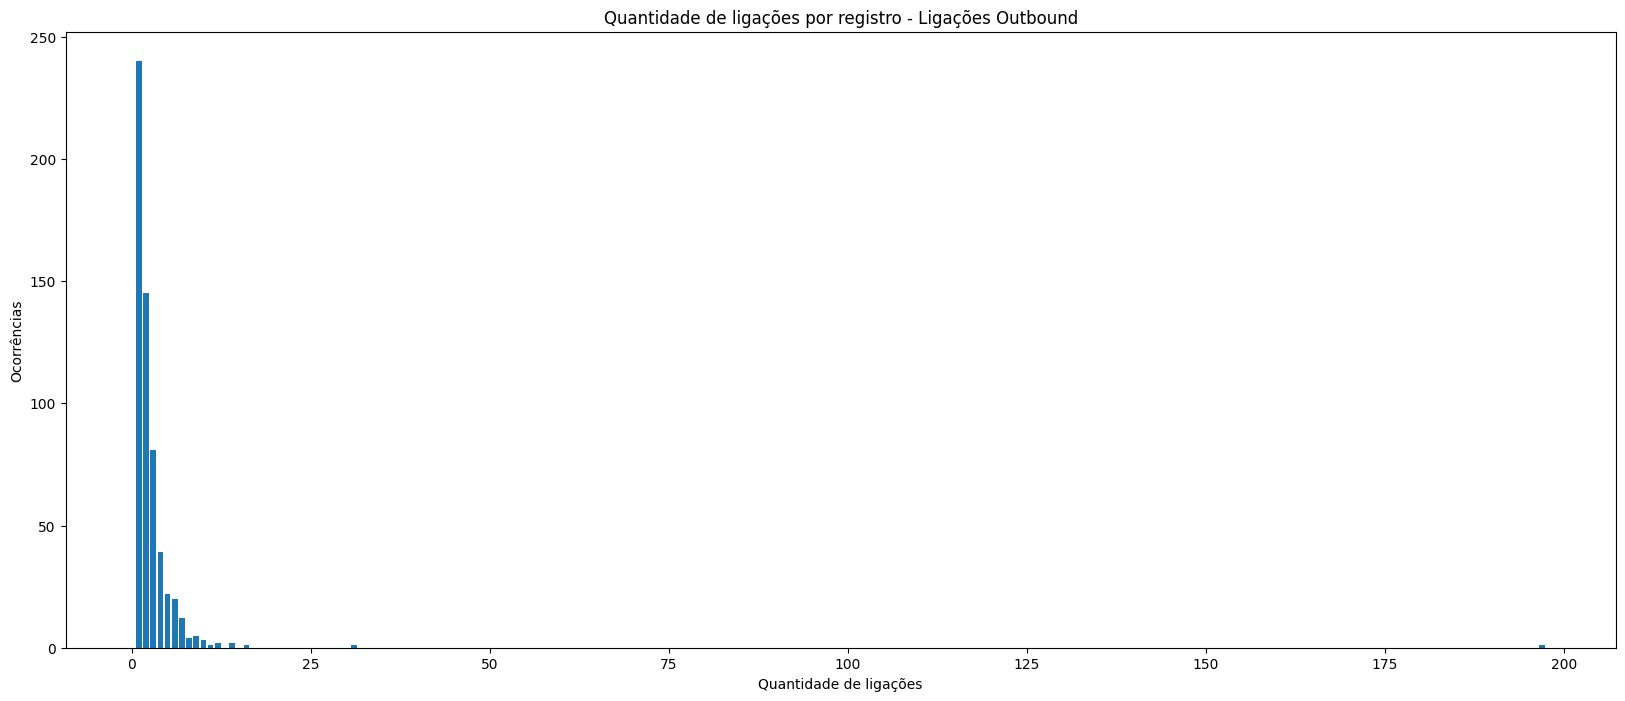

In [60]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values) 
plt.xlabel('Quantidade de ligações')
plt.ylabel('Ocorrências')
plt.title('Quantidade de ligações por registro - Ligações Outbound')
plt.show()

### activities_count

In [61]:
activities_count = df_leo['activities_count']


In [62]:

vc = activities_count.value_counts()
vc

activities_count
0.0     346
1.0     189
2.0     128
3.0      93
5.0      79
4.0      74
6.0      49
8.0      43
9.0      37
7.0      36
11.0     11
10.0     11
12.0      7
13.0      5
45.0      1
15.0      1
22.0      1
17.0      1
30.0      1
20.0      1
18.0      1
14.0      1
Name: count, dtype: int64

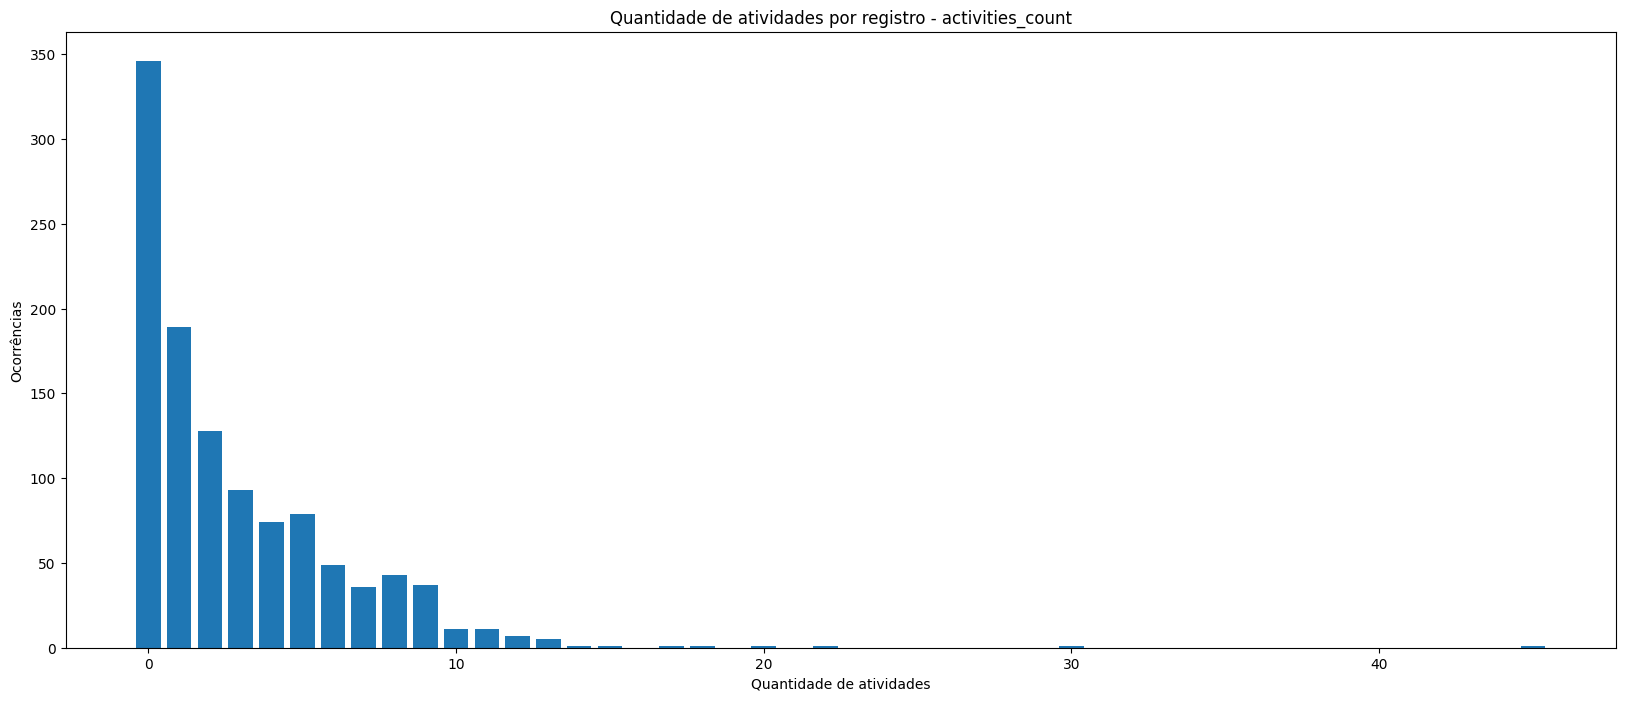

In [63]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de atividades')
plt.ylabel('Ocorrências')
plt.title('Quantidade de atividades por registro - activities_count')
plt.show()

### Qde Total de Faturas

In [64]:
qde_total_faturas = df_leo['Qde Total de Faturas']

In [65]:
vc = qde_total_faturas.value_counts()
vc

Qde Total de Faturas
3.0     35
1.0     32
2.0     26
5.0     22
8.0     20
4.0     20
7.0     18
6.0     13
9.0     12
10.0     8
11.0     8
13.0     8
14.0     8
12.0     6
16.0     5
15.0     5
20.0     2
21.0     1
23.0     1
18.0     1
30.0     1
Name: count, dtype: int64

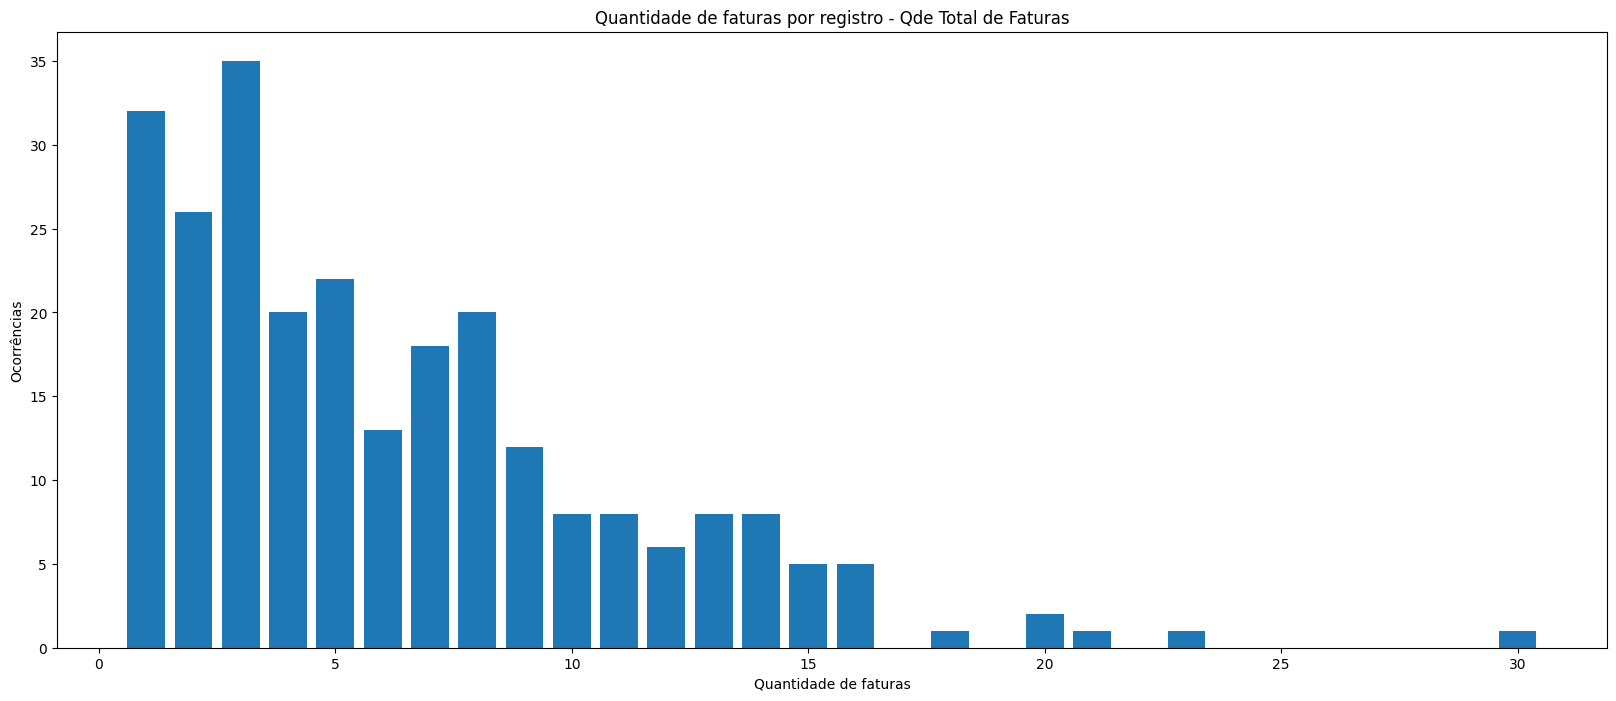

In [66]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de faturas')
plt.ylabel('Ocorrências')
plt.title('Quantidade de faturas por registro - Qde Total de Faturas')

plt.show()

Correlação entre as features

In [67]:
df_leo_corr = df_leo.drop(['Qde Prescrições', 'Datas Acolhimento', 'Faltas Atendimento Médico'], axis=1)    # retirando as features que não são numéricas
corr_matrix = df_leo_corr.corr()
corr_matrix

ValueError: could not convert string to float: '65; 66; 64'

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

NameError: name 'corr_matrix' is not defined

<Figure size 1000x300 with 0 Axes>

In [ ]:
df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1202 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              1202 non-null   bool   
 3   id_stage                       1079 non-null   object 
 4   Data Última Mensagens Inbound  1091 non-null   object 
 5   Faltas Atendimento Médico      1202 non-null   bool   
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1178 non-null   float64
dtypes: bool(3), float64(4), object(5)
memory usage: 

### Variáveis categóricas

#### Dates

In [ ]:
df_leo['Data Última Mensagens Inbound'] = pd.to_datetime(df_leo['Data Última Mensagens Inbound'])
df_leo['Data Última Ligações Inbound'] = pd.to_datetime(df_leo['Data Última Ligações Inbound'])

df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Qde Prescrições                1201 non-null   bool          
 1   Ligações Outbound              579 non-null    float64       
 2   Datas Acolhimento              679 non-null    object        
 3   id_stage                       1078 non-null   object        
 4   Data Última Mensagens Inbound  1090 non-null   datetime64[ns]
 5   Faltas Atendimento Médico      227 non-null    float64       
 6   Pontos de Atenção              62 non-null     object        
 7   activities_count               1116 non-null   float64       
 8   Recebe Comunicados?            62 non-null     object        
 9   Qde Total de Faturas           252 non-null    float64       
 10  Data Última Ligações Inbound   118 non-null    datetime64[ns]
 11  id_gender        

C:\Users\Gustavin\AppData\Local\Temp\ipykernel_46872\2292309337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leo['Data Última Mensagens Inbound'] = pd.to_datetime(df_leo['Data Última Mensagens Inbound'])
C:\Users\Gustavin\AppData\Local\Temp\ipykernel_46872\2292309337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leo['Data Última Ligações Inbound'] = pd.to_datetime(df_leo['Data Última Ligações Inbound'])


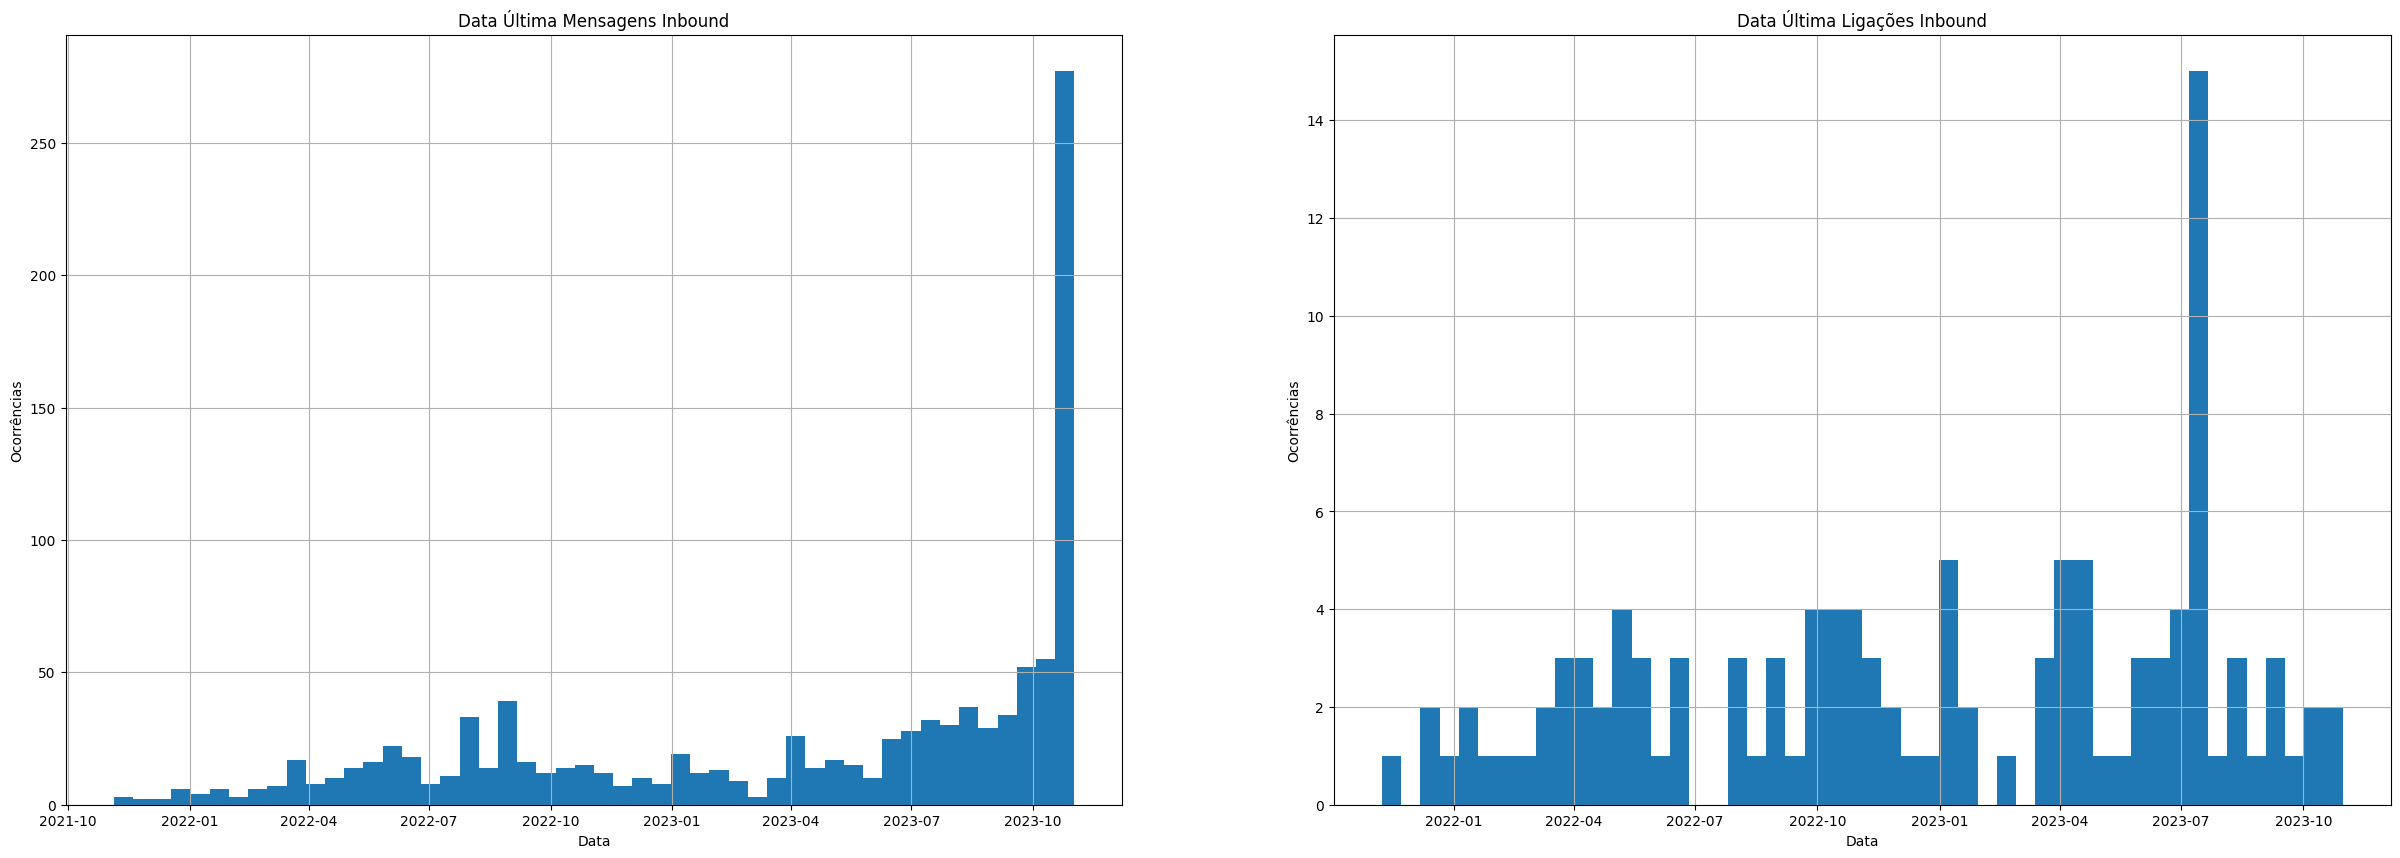

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# plot 1
df_leo['Data Última Mensagens Inbound'].hist(ax=ax[0], bins=50)
ax[0].set_title('Data Última Mensagens Inbound')

# plot 2
df_leo['Data Última Ligações Inbound'].hist(ax=ax[1], bins=50)
ax[1].set_title('Data Última Ligações Inbound')

# xlabel e ylabel
for i in range(2):
    ax[i].set_xlabel('Data')
    ax[i].set_ylabel('Ocorrências')

plt.show()

#### Recebe Comunicados?

In [ ]:
df_leo['Recebe Comunicados?'].value_counts()

Recebe Comunicados?
False    62
Name: count, dtype: int64

#### Pontos de Atenção

In [ ]:
df_leo['Pontos de Atenção'].value_counts()

Pontos de Atenção
False    62
Name: count, dtype: int64

#### id_stage

In [ ]:
df['id_stage'].value_counts()

for linha in df['id_stage'].value_counts().index:
    try:
        # verifica se o formato já está em int
        print(f"{linha} - {int(linha)}")
    except:
        array = linha.split('; ')
        for i in range(len(array)):
            array[i] = int(array[i])
        print(f"{linha} - {array}")



65 - 65
64 - 64
65; 64 - [65, 64]
64; 65 - [64, 65]
64; 64 - [64, 64]
65; 65 - [65, 65]
65; 66 - [65, 66]
64; 66; 65 - [64, 66, 65]
66; 65 - [66, 65]
65; 64; 66 - [65, 64, 66]
65; 66; 64 - [65, 66, 64]
66 - 66
64; 64; 64 - [64, 64, 64]
64; 64; 65; 66 - [64, 64, 65, 66]
65; 64; 64; 64 - [65, 64, 64, 64]
66; 65; 64 - [66, 65, 64]
64; 66 - [64, 66]
65; 64; 65 - [65, 64, 65]
64; 64; 64; 64 - [64, 64, 64, 64]
64; 64; 64; 64; 64; 64; 64; 64; 64; 64 - [64, 64, 64, 64, 64, 64, 64, 64, 64, 64]


### Insights

- **Datas Acolhimento**: a coluna possui todos os valores setados como False, logo por enquanto não entrou na análise. O mesmo vale para a coluna **Faltas Atendimento Médico**, **Recebe Comunicados?** e **Pontos de Atenção**.

- **id_gender**: a coluna possui dois valores possíveis (63 e 64), que representam os gêneros masculino e feminino. A dúvida consiste em qual valor representa qual gênero.

- **Pontos de Atenção**: a coluna possui apenas 62 valores não-nulos, o que representa uma porção muito pequena do total de dados possíveis (1202)

- **id_stage**: a coluna, que representa o tipo de organização por assinatura (PJ, PF ou Acolimento Desemprego), possui casos onde existem mais de 1 tipo de identificador para a mesma pessoa, como por exemplo na linha "66; 65; 64". A dúvida consiste em como tratar esses casos.

- **Data Última Mensagens Inbound** e **Data Última Mensagens Outbound**: ao plotar o gráfico das duas features, foi possível notar um aumento nos dois casos mais perto do fim do ano. A dúvida consiste em se esse aumento é sazonal ou não, ou seja, se é apenas uma coincidência ou se existe algum motivo para esse aumento.

- No geral as colunas possuem muitos dados faltantes, a questão consiste em como tratá-los, seja excluindo as colunas ou preenchendo os valores faltantes com algum valor.

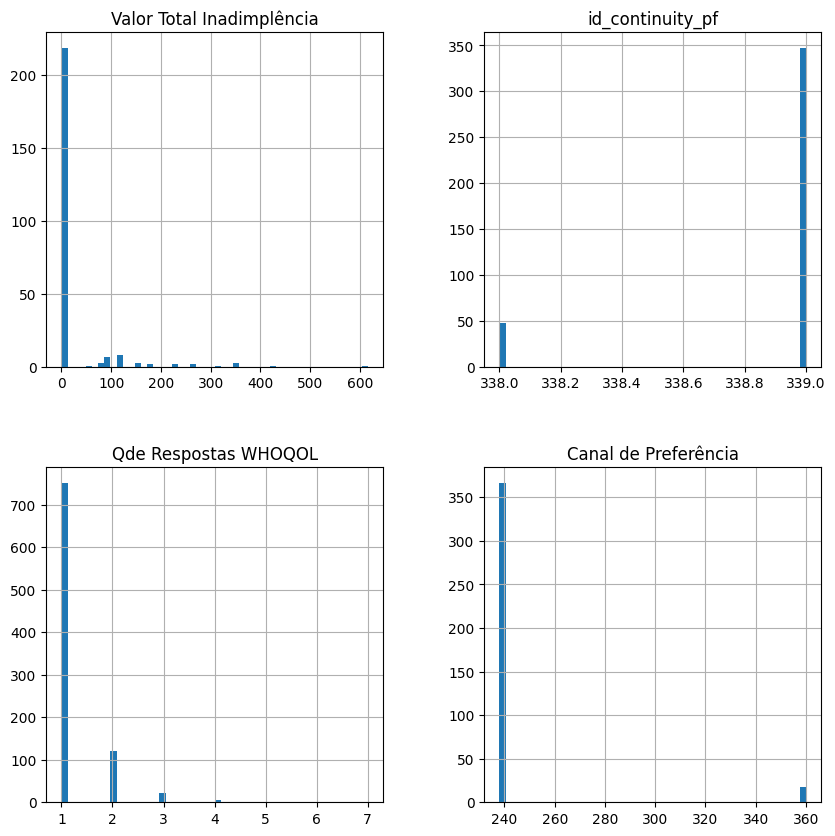

In [ ]:
df_matheus.hist(bins=50, figsize=(10,10))
plt.show()

## Análises - Alfredo

array([[<AxesSubplot:title={'center':'Mensagens Outbound'}>,
        <AxesSubplot:title={'center':'stay_in_pipeline_stages_whoqol'}>],
       [<AxesSubplot:title={'center':'id_label'}>,
        <AxesSubplot:title={'center':'done_activities_count'}>],
       [<AxesSubplot:title={'center':'Faltas Psicoterapia'}>,
        <AxesSubplot:>]], dtype=object)

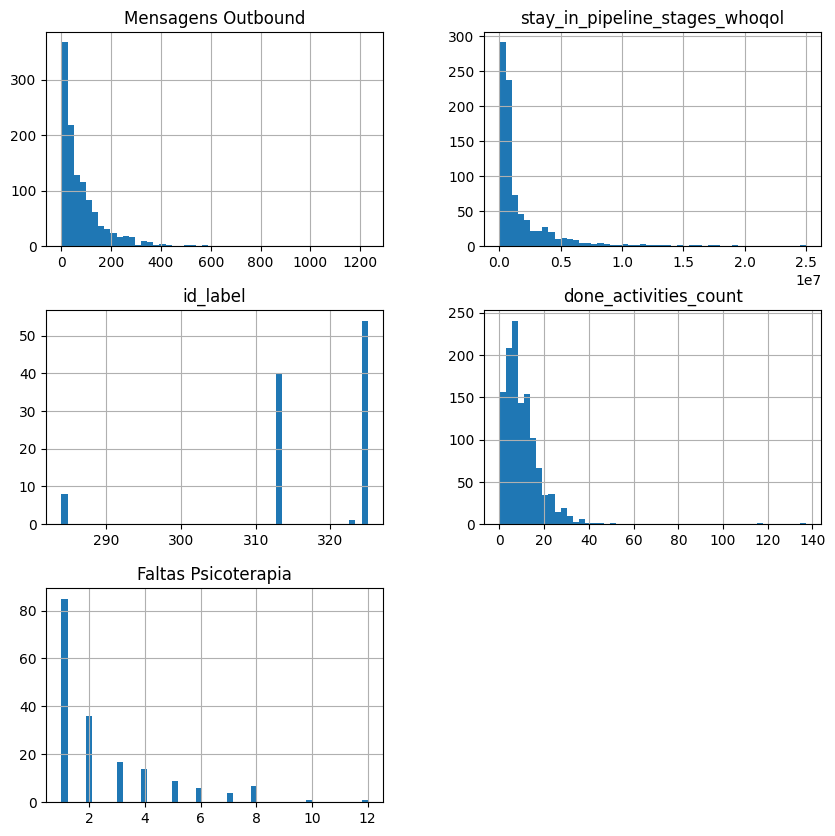

In [ ]:
df_alfredo.hist(bins=50, figsize=(10,10))

### lost_reason.1 - Onboarding

Motivo pelo qual a pessoa não concluiu o processo de onboarding.

In [ ]:
df['lost_reason.1'].dropna()

1                                     Cancelou assinatura
6                                     Cancelou assinatura
9       [Onboarding] Não retornou aos contatos de resgate
17      [Onboarding] Não tem interesse em seguir nas e...
23      [Onboarding] Não tem interesse em seguir nas e...
                              ...                        
1122    [Onboarding] Não retornou aos contatos de resgate
1126    [Onboarding] Não retornou aos contatos de resgate
1129    [Onboarding] Não retornou aos contatos de resgate
1131    [Onboarding] Não retornou aos contatos de resgate
1148    [Onboarding] Não retornou aos contatos de resgate
Name: lost_reason.1, Length: 317, dtype: object

### lost_reason - Assinatura

Motivo do cancelamento por assinatura (separada por vírgula).

In [ ]:
df['lost_reason'].dropna()

24                 [Assinatura] Não quer seguir com a Ana
28                    [Assinatura] Precisou cortar custos
30      [Assinatura] Cancelamento após saída da psicot...
36       [Assinatura] Empresa cancelou o benefício da Ana
37                     Empresa está encerrando a operação
                              ...                        
1110                  [Assinatura] Precisou cortar custos
1112               [Assinatura] Não quer seguir com a Ana
1114                            [Assinatura] Desligamento
1120                            [Assinatura] Desligamento
1133                            [Assinatura] Desligamento
Name: lost_reason, Length: 520, dtype: object

### Mensagens Outbound - 

Contagem de mensagens enviadas pela equipe de saúde. Pode ser interessante ver q quantidade ao longo do tempo, assim, mostrando como que o cuidado vai evoluindo com o passar do tempo, mas, não temos acesso ao log de mensagens por dia, apenas por cliente.

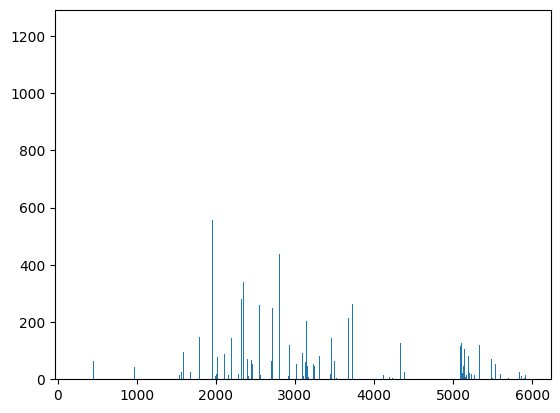

In [ ]:
plt.bar(df['id_person'],df['Mensagens Outbound'])
plt.show()

In [ ]:
print("Media de mensagens enviadas pela equipe de saude: ", df['Mensagens Outbound'].mean())
print("Primeiro quartil de mensagens enviadas: ", df['Mensagens Outbound'].quantile(0.25))
print("Quartil superior de mensagens enviadas: ", df['Mensagens Outbound'].quantile(0.75))

Media de mensagens enviadas pela equipe de saude:  83.27806563039724
Primeiro quartil de mensagens enviadas:  19.0
Quartil superior de mensagens enviadas:  110.0


### Datas Atendimento Médico - 
Data dos atendimentos com a equipe médica. Importante ver a quantidade de atendimentos por cliente ou empresa que existem.


In [ ]:
df['Datas Atendimento Médico']

0       False
1       False
2       False
3       False
4       False
        ...  
1197    False
1198    False
1199    False
1200    False
1201    False
Name: Datas Atendimento Médico, Length: 1202, dtype: bool

In [ ]:
df[df['Datas Atendimento Médico']!=False]

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos


**Coluna completamente nula**

### stay_in_pipeline_stages_whoqol - 

Tempo até a realização da atendimento para pactuar a jornada de cuidados. Não sabemos qual a unidade de medida de tempo utilizada.

In [ ]:
df['stay_in_pipeline_stages_whoqol']

len(df['stay_in_pipeline_stages_whoqol'].dropna())

864

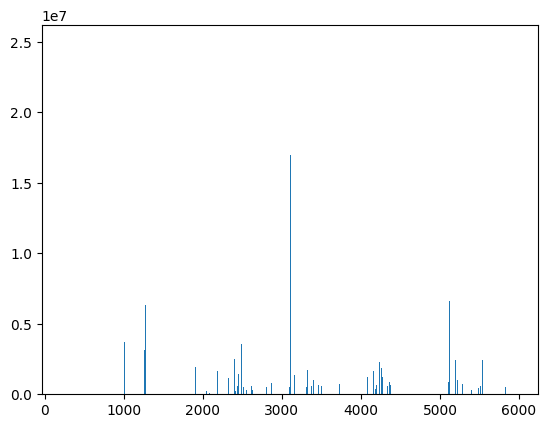

In [ ]:
filtro = pd.notna(df['stay_in_pipeline_stages_whoqol'])

users_fizeram = df[filtro]['id_person']
tempo_testes_feitos = df[filtro]['stay_in_pipeline_stages_whoqol']

plt.bar(users_fizeram, tempo_testes_feitos)
plt.show()

O que é possível ver são tempos muito altos (já que a escala está relativa), indicando uma possível demora para realizar o teste de satisfação com a própria vida.

### id_label - 

Identificador do status do agendamento durante o processo de onboarding: Convera Agendada, Reagendar.

Só há 103 valores não nulos e não sabemos o valor associado aos números presentes na coluna (cada um representa uma classe).


<AxesSubplot:>

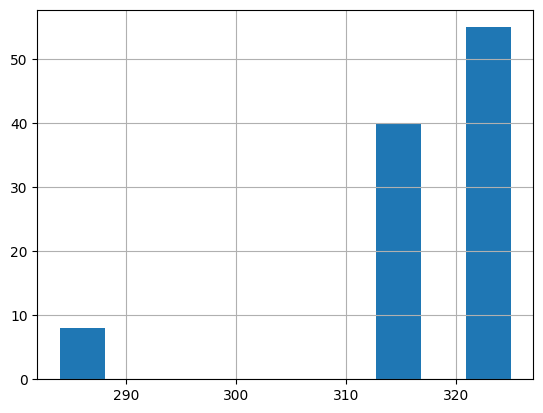

In [ ]:
df['id_label'].hist()

In [ ]:
df['id_label'].dropna()

38      284.0
69      325.0
78      284.0
81      284.0
137     323.0
        ...  
1182    313.0
1189    313.0
1191    313.0
1193    313.0
1198    313.0
Name: id_label, Length: 103, dtype: float64

### done_activities_count - 

Contagem das atividades concluídas relacionada à pessoa. Algo a ser levado em consideração quando analisarmos quais os clientes propícios a cancelar é o quanto eles usufruíram dos serviços antes do término.

In [ ]:
df['done_activities_count']

0       8
1       4
2       0
3       0
4       0
       ..
1197    0
1198    0
1199    0
1200    0
1201    0
Name: done_activities_count, Length: 1202, dtype: int64

<AxesSubplot:>

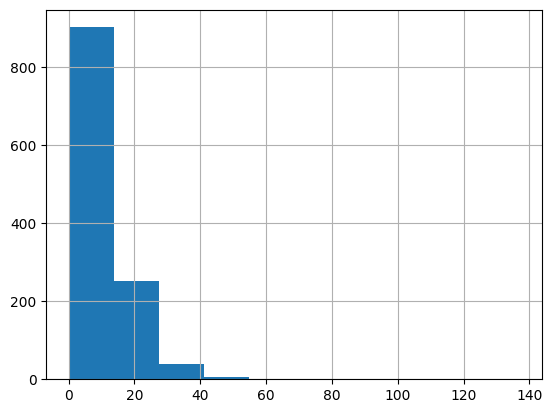

In [ ]:
df['done_activities_count'].hist()

In [ ]:
print("Primeiro quaril de atividades: ",df['done_activities_count'].quantile(0.25))
print("Quartil superior do número de ativiaddes feitas: ",df['done_activities_count'].quantile(0.75))

Primeiro quaril de atividades:  5.0
Quartil superior do número de ativiaddes feitas:  13.0


### state - 
Estado onde a pessoa reside.

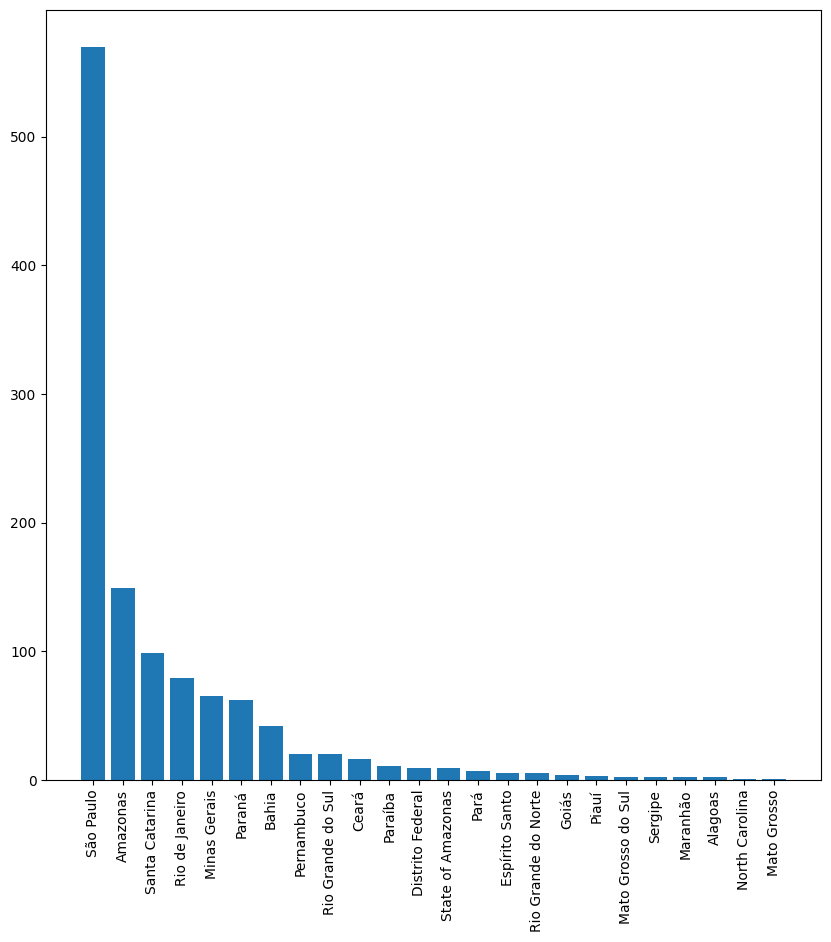

In [ ]:
vc = df['state'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(vc.index,vc.values)
plt.xticks(rotation=90)
plt.show()

Grande maioria dos usuários são situados em São Paulo.

### Faltas Psicoterapia - 

Contagem das faltas considerando apenas as sessões de psicoterapia. Se alguém acabar por faltar bastante, pode indicar alguma insatisfação com o serviço ou insegurança com o processo de terapia.

Há apenas 180 valores não nulos

In [ ]:
df['Faltas Psicoterapia'].dropna()

28       1.0
50       8.0
55      12.0
65       1.0
72       2.0
        ... 
1105     2.0
1106     1.0
1111     1.0
1138     1.0
1142     1.0
Name: Faltas Psicoterapia, Length: 180, dtype: float64

<AxesSubplot:>

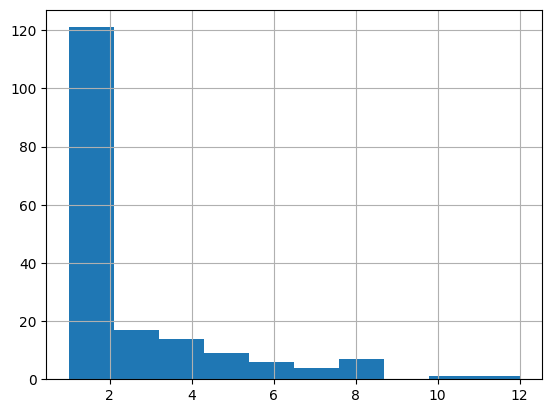

In [ ]:
df['Faltas Psicoterapia'].hist()

O baixo índice de faltas indica que muitas pessoas estão realmente indo aos atendimentos. O problema é que temos apenas 180 amostras não nulas no dataset, se não seria uma informação relevante.

### Data Última Mensagens Outbound
Data da última mensagem enviada pela equipe de saúde. Se essa data for anterior à última data da mensagem enviada pelo cliente isso é um possível problema.

In [ ]:
df['Data Última Mensagens Outbound']

0       2023-01-30 16:24:27
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
1197                    NaN
1198                    NaN
1199    2023-10-31 14:01:06
1200                    NaN
1201                    NaN
Name: Data Última Mensagens Outbound, Length: 1202, dtype: object

In [ ]:
df['Data Última Mensagens Outbound'].value_counts()

2022-03-24 11:55:48    5
2023-10-31 18:40:50    3
2023-10-26 07:40:52    3
2023-10-30 18:40:51    3
2023-10-03 10:33:21    3
                      ..
2022-11-07 17:17:07    1
2023-10-27 18:55:34    1
2023-10-26 20:58:51    1
2022-06-17 11:01:17    1
2023-10-31 14:01:06    1
Name: Data Última Mensagens Outbound, Length: 1125, dtype: int64

In [ ]:
df['Data Última Mensagens Outbound'] = pd.to_datetime(df['Data Última Mensagens Outbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Outbound']

0      2023-01-30 16:24:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1197                   NaT
1198                   NaT
1199   2023-10-31 14:01:06
1200                   NaT
1201                   NaT
Name: Data Última Mensagens Outbound, Length: 1202, dtype: datetime64[ns]

In [ ]:
df['Data Última Mensagens Inbound'] = pd.to_datetime(df['Data Última Mensagens Inbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Inbound']

0      2023-01-02 15:36:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1197                   NaT
1198                   NaT
1199   2023-10-31 14:01:01
1200                   NaT
1201                   NaT
Name: Data Última Mensagens Inbound, Length: 1202, dtype: datetime64[ns]

In [ ]:
filtro = df['Data Última Mensagens Inbound'] > df['Data Última Mensagens Outbound']

df[filtro]

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
17,408,1963-10-04,63.0,82.0,São Paulo,Marília,17502-242,428.0,2379.0,2021-01-28,...,11.0,2023-06-06 07:59:43,30.0,32.0,Cartão de crédito,91.54,0.0,0.0,0.0,False
23,463,1971-02-28,64.0,82.0,NaN,NaN,NaN,NaN,NaN,2021-02-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
30,860,1998-05-06,63.0,80.0,Paraná,Londrina,86020-410,NaN,NaN,2022-06-21,...,NaN,NaN,13.0,14.0,Cartão de crédito,88.00,1.0,0.0,0.0,False
38,973,1986-10-11,64.0,80.0,Minas Gerais,Uberlândia,38405-364,412.0,NaN,2021-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
51,1152,1994-08-31,64.0,80.0,São Paulo,São Carlos,13569-060,NaN,NaN,2021-08-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,5877,2003-01-15,63.0,80.0,Minas Gerais,Belo Horizonte,31310-360,NaN,NaN,2023-10-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1173,5893,1983-12-02,64.0,82.0,São Paulo,São Paulo,04303-001,NaN,NaN,2023-10-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1175,5897,1994-02-12,64.0,80.0,Pernambuco,Recife,54290-050,NaN,NaN,2023-10-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1184,5914,1998-03-03,64.0,80.0,Bahia,Salvador,40230-113,NaN,NaN,2023-10-24,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.00,0.0,0.0,0.0,False


Como o datafranme acima indica, 196 clientes tiveram mensagens não respondidas até agora pela central de atendimento (no momento de criação dos dados)

### Qde Atendimentos Acolhimento - 

Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health. Coluna inteira está vazia.

In [ ]:
df['Qde Atendimentos Acolhimento'].describe()

count      1202
unique        1
top       False
freq       1202
Name: Qde Atendimentos Acolhimento, dtype: object

### Status - Assinatura 

Status por assinatura (separada por vírgula): Cancelada (lost), Ativa (won). O que acontece se o status for nulo?

In [ ]:
df['status'].dropna()

24      lost
28      lost
30      lost
36      lost
37      lost
        ... 
1196     won
1197     won
1198     won
1200     won
1201     won
Name: status, Length: 1079, dtype: object

In [ ]:
df['status'].value_counts()

won                                                 551
lost                                                450
lost; lost                                           31
won; lost                                            13
lost; won                                            12
won; won                                              6
lost; lost; lost                                      5
lost; won; lost                                       2
won; lost; lost; lost                                 1
lost; open                                            1
lost; lost; won; lost                                 1
open; won; lost                                       1
lost; won; won; won                                   1
won; won; won                                         1
lost; lost; won                                       1
won; lost; won                                        1
won; won; won; won; won; won; won; won; won; won      1
Name: status, dtype: int64

In [ ]:
def lastStatus(x):
    s = x.split(';')
    return s[-1].strip()

status = df['status'].dropna().apply(lastStatus)

status.value_counts()

won     574
lost    504
open      1
Name: status, dtype: int64

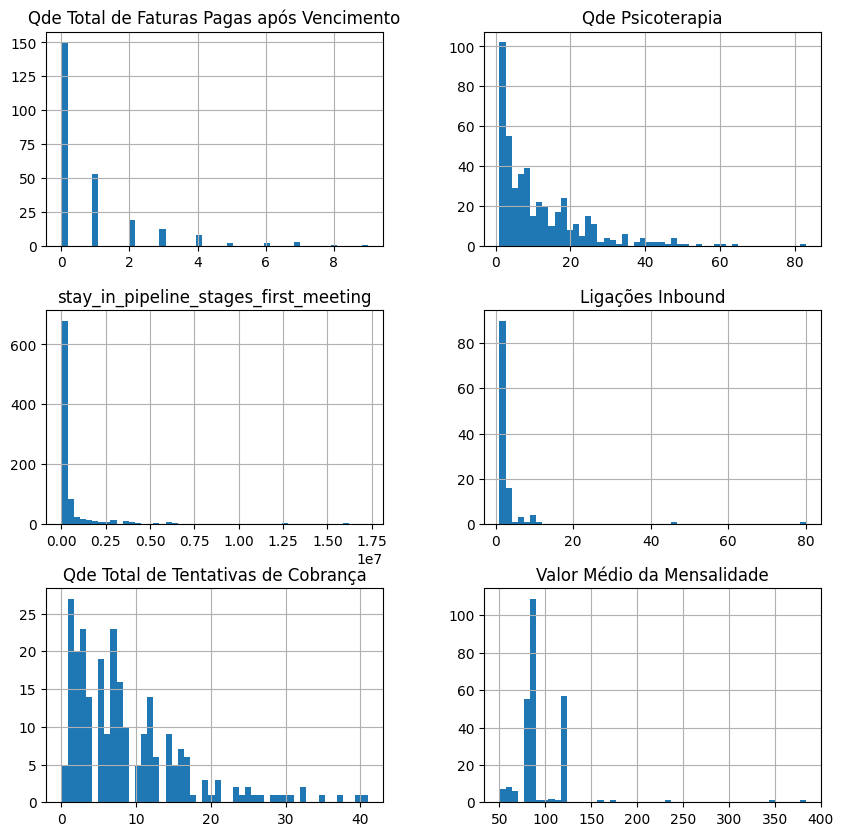

In [ ]:
df_gustavo.hist(bins=50, figsize=(10,10))
plt.show()

# Análise - Matheus

In [ ]:
df_matheus.head()

,Faltas Acolhimento,Qde Perfis de Pagamento Inativos,Datas Prescrição,Valor Total Inadimplência,id_continuity_pf,add_time,Qde Respostas WHOQOL,Datas Psicoterapia,Cancelamentos Acolhimento,won_time,Canal de Preferência,Ambiental
0,False,False,False,NaN,NaN,2021-09-16 18:14:49,3.0,NaN,False,2022-04-29 03:00:00,NaN,"4,0; 4,3; 4,0"
1,False,False,False,NaN,339.0,2021-09-16 18:15:46,NaN,NaN,False,NaN,NaN,NaN
2,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
3,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Descriçao do dataset

In [ ]:
df_matheus.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Valor Total Inadimplência,252.0,24.182738,76.092674,0.0,0.0,0.0,0.0,616.0
id_continuity_pf,395.0,338.878481,0.327144,338.0,339.0,339.0,339.0,339.0
Qde Respostas WHOQOL,898.0,1.204900,0.526127,1.0,1.0,1.0,1.0,7.0
Canal de Preferência,384.0,244.635417,25.618050,238.0,239.0,239.0,239.0,360.0


### Análise dos tipos de dados

In [ ]:
df_matheus.dtypes


Faltas Acolhimento                     bool
Qde Perfis de Pagamento Inativos       bool
Datas Prescrição                       bool
Valor Total Inadimplência           float64
id_continuity_pf                    float64
add_time                             object
Qde Respostas WHOQOL                float64
Datas Psicoterapia                   object
Cancelamentos Acolhimento              bool
won_time                             object
Canal de Preferência                float64
Ambiental                            object
dtype: object

### Análise da correlação entre as colunas numéricas

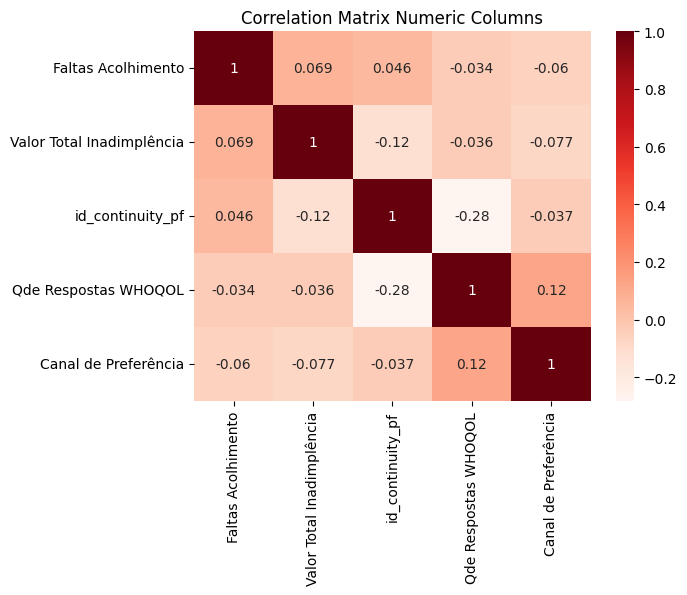

In [ ]:
correlation_matrix_numeric_columns = df_matheus.select_dtypes(include=[np.number]).corr()
plt.figure()
sns.heatmap(correlation_matrix_numeric_columns, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix Numeric Columns')
plt.show()

### Análise da distribuição das colunas numéricas

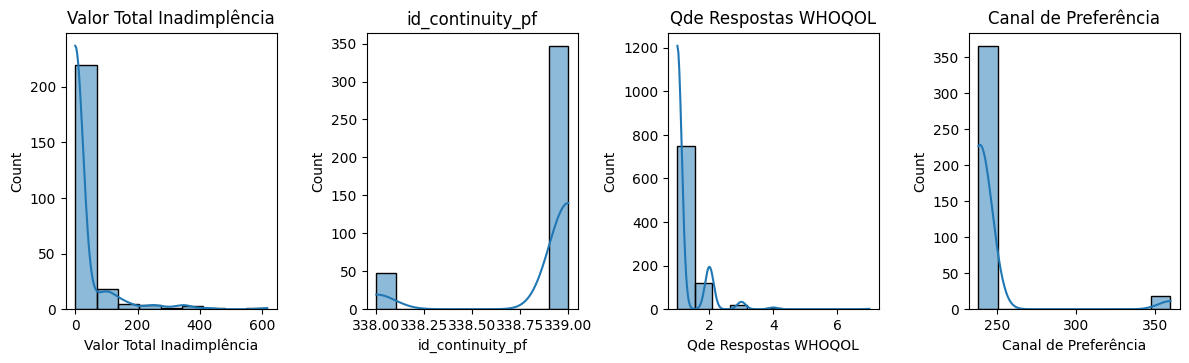

In [ ]:
colunas_numericas = df_matheus.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_matheus[coluna], kde=True)
    plt.title(coluna)
plt.tight_layout()

### Análise da distribuição das colunas de datas agrupadas por mês de cada ano

C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


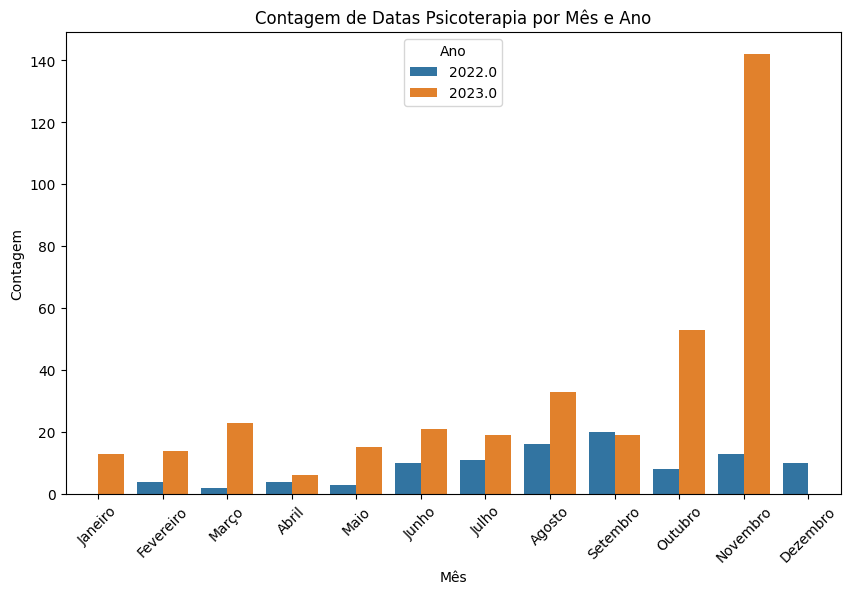

C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


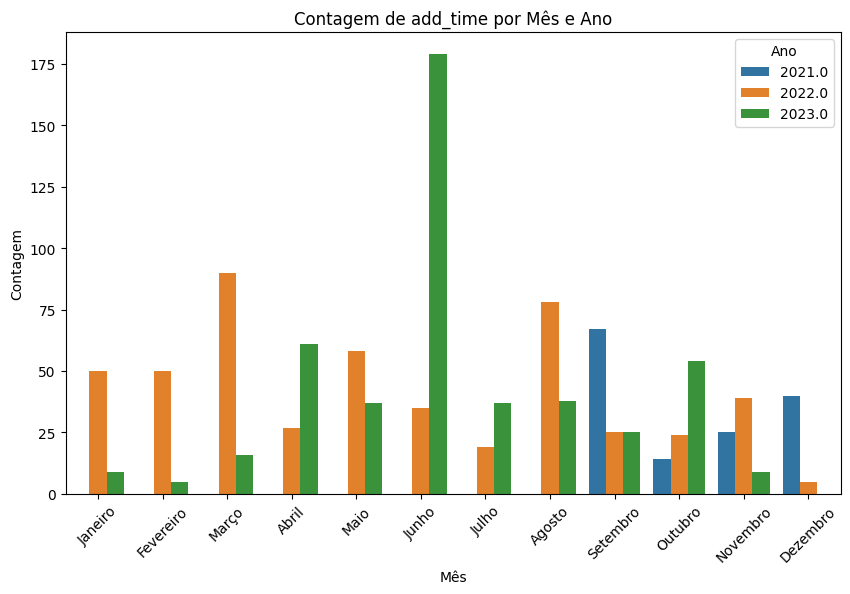

C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
C:\Users\code\AppData\Local\Temp\ipykernel_25184\969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


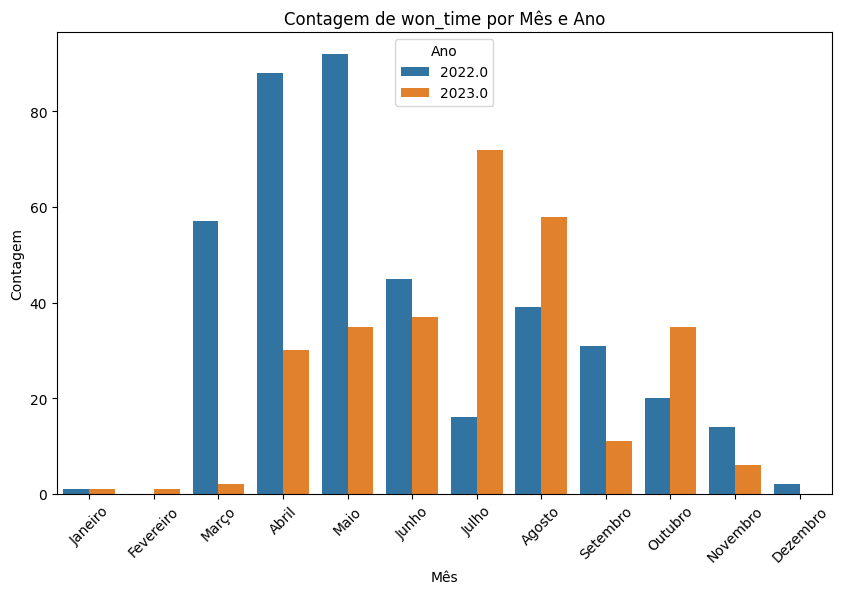

In [ ]:
#COnverter won_time  para data 

date_columns = ['Datas Psicoterapia', 'add_time','won_time']
#colocar o nome dos meses ao inves dos numeros
nome_dos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

for coluna in date_columns:
   
    df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
    df_matheus[coluna].head()
    # Criar coluna de ano
    new_name = coluna + '_year'
    df_matheus[new_name] = df_matheus[coluna].dt.year
    # Plotar gráfico de barras separado por ano
    plt.figure(figsize=(10, 6))  # Definir tamanho da figura
    # Usar seaborn para criar facetas
    sns.countplot(x=df_matheus[coluna].dt.month, hue=df_matheus[new_name])
    # Adicionar rótulos e título
    plt.xlabel('Mês')
    plt.ylabel('Contagem')
    plt.title(f'Contagem de {coluna} por Mês e Ano')
    plt.xticks(range(0, 12), nome_dos_meses, rotation=45)
    plt.legend(title='Ano')

    # Mostrar o gráfico
    plt.show()


### Análise das colunas booleanas

In [ ]:
#analise das colunas booleanas
colunas_booleanas = df_matheus.select_dtypes(include=[np.bool]).columns
df_matheus[colunas_booleanas].describe().transpose()

C:\Users\code\AppData\Local\Temp\ipykernel_25184\1233420805.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  colunas_booleanas = df_matheus.select_dtypes(include=[np.bool]).columns


,count,unique,top,freq
Faltas Acolhimento,1202,1,False,1202
Qde Perfis de Pagamento Inativos,1202,1,False,1202
Datas Prescrição,1202,1,False,1202
Cancelamentos Acolhimento,1202,1,False,1202


# Gustavo


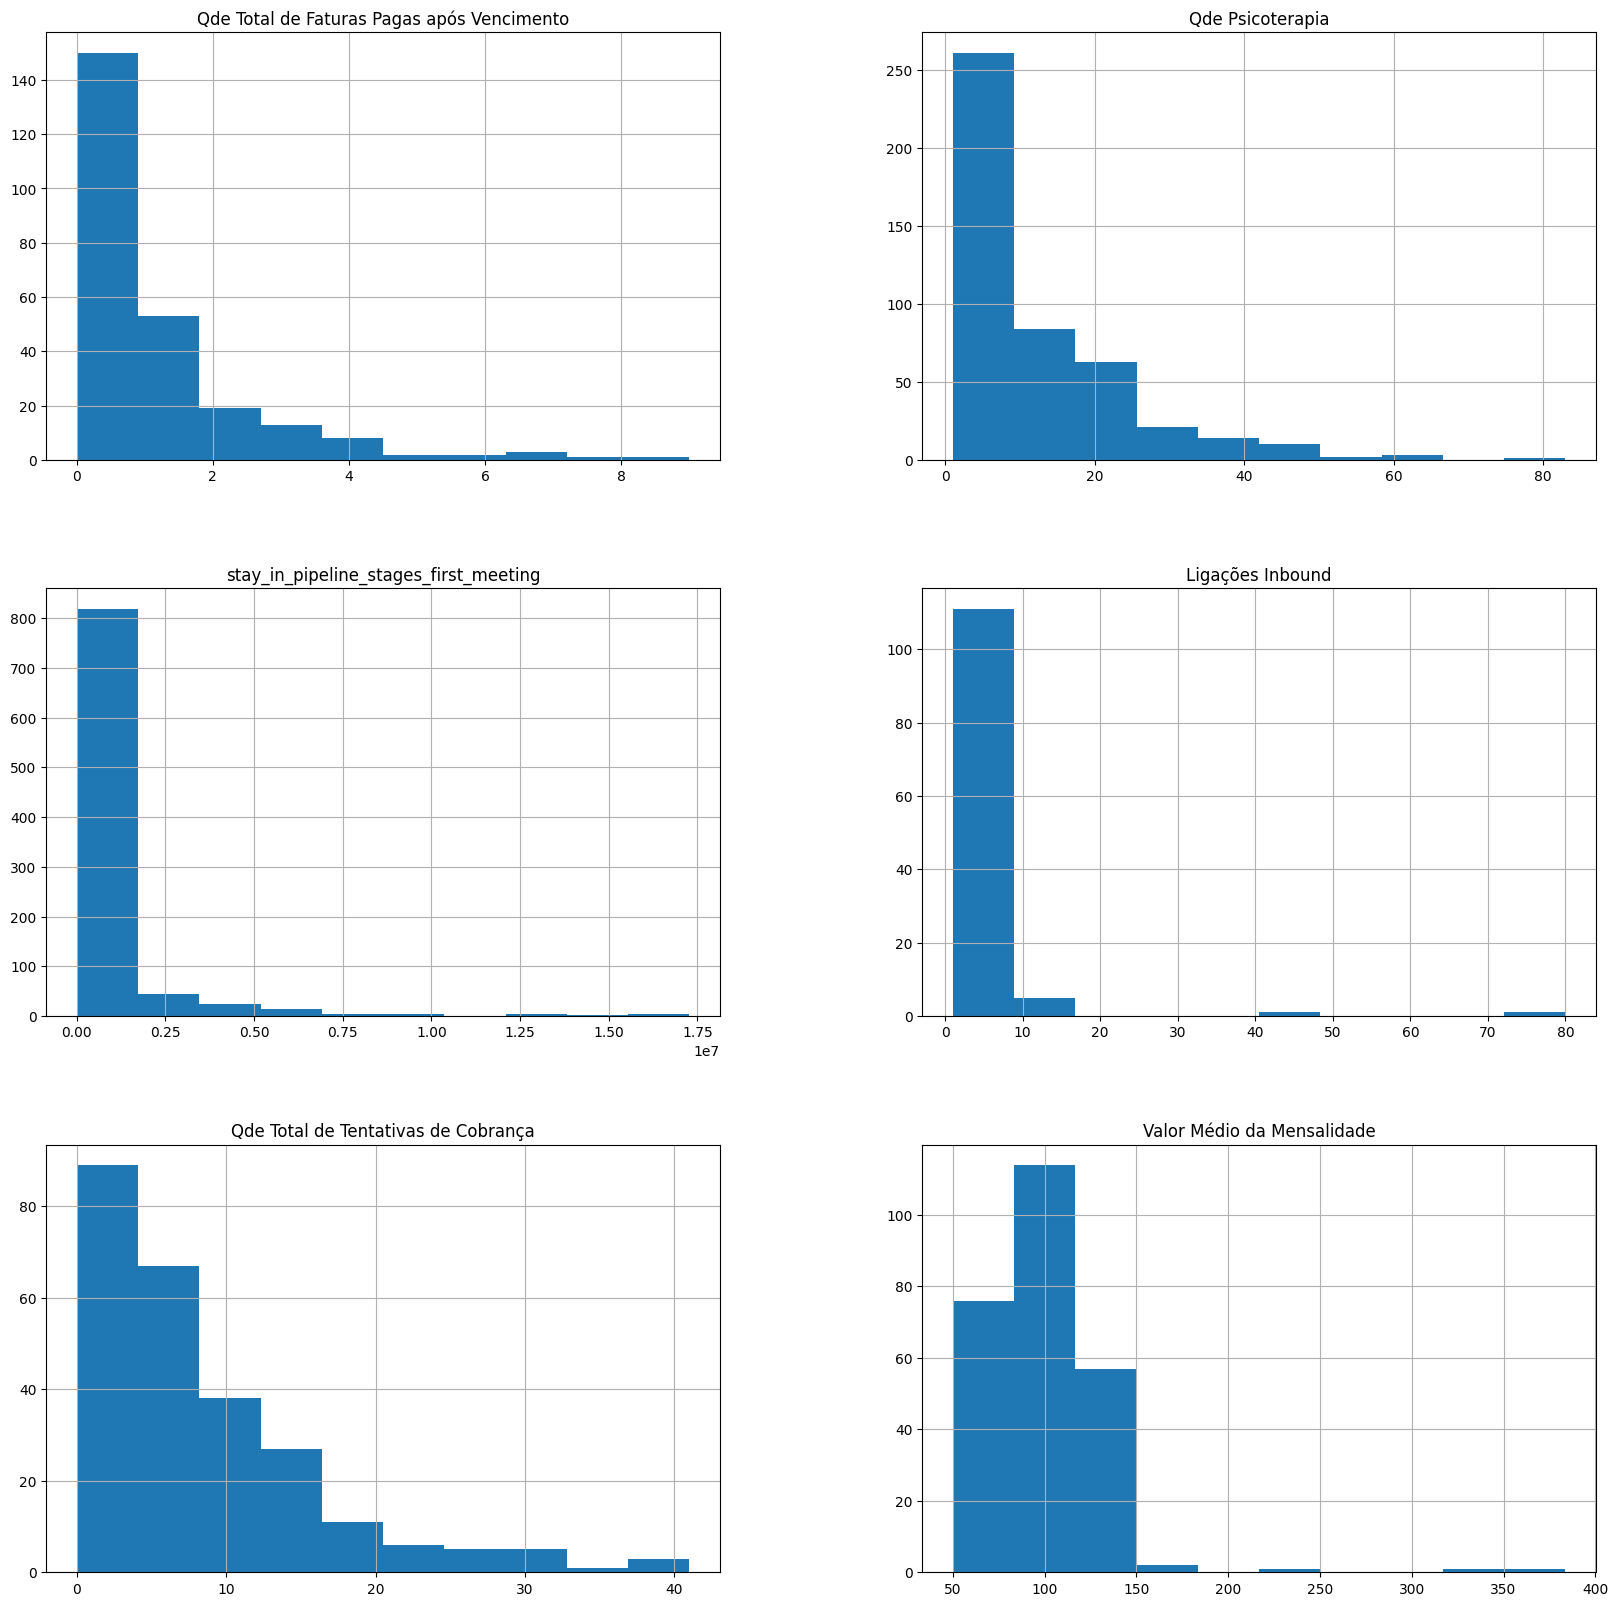

In [ ]:
df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]
df_gustavo.hist(figsize=(20,20))
plt.show()

Coluna 'Qde Total de Faturas Pagas após Vencimento' possui muitos valores nulos, deveriamos ou preencher utilizando um mecanismo de imputer ou retirar essa coluna

In [ ]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Faturas Pagas após Vencimento'].notna()]
df_notnan['Qde Total de Faturas Pagas após Vencimento'].describe()

Coluna 'birthdate' deve ser modificada para facilitar a implementação do algoritmo

In [ ]:
df_notnan = df_gustavo[df_gustavo['birthdate'].notna()]
df_notnan['birthdate'].describe()

Por não existir 0 na quantidade de psicoterapia talvez os 0 sejam considerados como nan

In [ ]:
df_notnan = df_gustavo[df_gustavo['Qde Psicoterapia'].notna()]
df_notnan['Qde Psicoterapia'].describe()

Tempo até responder o questionário de qualidade de vida.
Qual a medida de tempo?

In [ ]:
df_notnan = df_gustavo[df_gustavo['stay_in_pipeline_stages_first_meeting'].notna()]
df_notnan['stay_in_pipeline_stages_first_meeting'].describe()

Status do processo de onboarding: Aberto, Perdido, Ganho
Dados estão ok pode dropar as linhas que não tem status ou fazer um imputer

In [ ]:
df_notnan = df_gustavo[df_gustavo['status.1'].notna()]
df_notnan['status.1'].describe()

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [ ]:
df_notnan = df_gustavo[df_gustavo['Data Última Ligações Outbound'].notna()]
df_notnan['Data Última Ligações Outbound'].describe()

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [ ]:
df_notnan = df_gustavo[df_gustavo['lost_time'].notna()]
df_notnan['lost_time'].describe()

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [ ]:
df_notnan = df_gustavo[df_gustavo['Ligações Inbound'].notna()]
df_notnan['Ligações Inbound'].describe()

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [ ]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Tentativas de Cobrança'].notna()]
df_notnan['Qde Total de Tentativas de Cobrança'].describe()

Todos são iguais deve dropar

In [ ]:
df_notnan = df_gustavo[df_gustavo['Cancelamentos Psicoterapia'].notna()]
df_notnan['Cancelamentos Psicoterapia'].describe()

Todos são iguais deve dropar

In [ ]:
df_notnan = df_gustavo[df_gustavo['Faltas Todos Atendimento'].notna()]
df_notnan['Faltas Todos Atendimento'].describe()

Poucos Valores

In [ ]:
df_notnan = df_gustavo[df_gustavo['Valor Médio da Mensalidade'].notna()]
df_notnan['Valor Médio da Mensalidade'].describe()